# Datasets of protein-ligand

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pdb_dir = '/home/yuan/data/pdb/rsync'
data_dir = './data'
outputs_dir = './outputs'
model_dir = './model'

src_dir = os.path.join(os.getcwd(), 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)
print(sys.path)

%load_ext autoreload
%autoreload 2

['/home/yuan/anaconda3/envs/openfold-env/lib/python310.zip', '/home/yuan/anaconda3/envs/openfold-env/lib/python3.10', '/home/yuan/anaconda3/envs/openfold-env/lib/python3.10/lib-dynload', '', '/home/yuan/anaconda3/envs/openfold-env/lib/python3.10/site-packages', '/home/yuan/anaconda3/envs/openfold-env/lib/python3.10/site-packages/openfold-2.2.0-py3.10-linux-x86_64.egg', '/home/yuan/bio/protein_design/protein-ligand/SFT_protein_ligand_complex/src']


In [3]:
import openfold
openfold

<module 'openfold' from '/home/yuan/anaconda3/envs/openfold-env/lib/python3.10/site-packages/openfold-2.2.0-py3.10-linux-x86_64.egg/openfold/__init__.py'>

## 1 view default datasets

In [13]:
# load datasets
train0 = pd.read_pickle('data0/pdb_train.p')
print('number of train:', train.shape)
test0 = pd.read_pickle('data0/pdb_test.p')
print('number of test:', test.shape)

number of train: (34277, 8)
number of test: (3646, 8)


In [14]:
pdb_id = '8iax'
train0[train0['pdb_id']==pdb_id]
test0[test0['pdb_id']==pdb_id]

,pdb_id,lig_id,seq,smiles,receptor_features,ligand_xyz,ligand_xyz_2d,ligand_bonds


In [15]:
test0.head(2).T

,0,1
pdb_id,7k38,6prt
lig_id,VTY,OWA
seq,MGIVEEAHNVKVLGTGSRFIVLAHGFGTDQSVWKHLVPHLLEEFRV...,SNPPPPETSNPNKPKRQTNQLQYLLRVVLKTLWKHQFAWPFQQPVD...
smiles,CC1=C[C@@H](O)OC1=O,COC(=O)C[C@H]1CC(=O)N(C)C1
receptor_features,{'rigidgroups_gt_frames': [[[[-0.5312262 0.2...,{'rigidgroups_gt_frames': [[[[-1.0563381e-01 -...
ligand_xyz,"[(22.289, 11.985, 9.225), (21.426, 11.623, 7.9...","[(-8.337, 7.189, -0.997), (-9.645, 6.452, -1.2..."
ligand_xyz_2d,"[(-2.031355975502858, -1.6316778784387098, 0.0...","[(4.883261310160714, -0.37850716807626705, 0.0..."
ligand_bonds,"[(0, 1), (1, 4), (4, 5), (5, 10), (10, 9), (9,...","[(11, 18), (18, 20), (20, 8), (8, 7), (7, 2), ..."


## 2. build pdb_protein_ligand_complexes
- source: https://huggingface.co/datasets/jglaser/pdb_protein_ligand_complexes

### 2.1 download pdb

### 2.2 create datasets

In [9]:
# test class
from src.parse_complex import ParseComplex

parser = ParseComplex(./data/pdb_tmp.txt)
# read ligand table, update self.ligand_expo
parser.read_ligand_expo()
parser.parse(5)

total pdb files: 226302
203671 22631


In [268]:
df = pd.read_pickle('data/pdb_tmp.p')
df

,pdb_id,seq,rigidgroups_gt_frames,torsion_angles_sin_cos,lig_id,ligand_mol,smiles,ligand_xyz,ligand_xyz_2d,ligand_bonds,ligand_token_bonds
0,2du5,MKFDPQKYRELAEKDFEAAWKAGKEILAERSPNELYPRVGFSFGKE...,[[[[ 0.50600564 0.7493685 -0.42708912 32.59 ...,"[[[2.69004699543195e-07, 0.01068895628178541],...",G,<rdkit.Chem.rdchem.Mol object at 0x7cc563280b80>,Nc1nc2c(ncn2C2OC(COP(=O)(O)O)C(O)C2O)c(=O)[nH]1,"[(37.72, 83.446, -47.043), (36.784, 82.768, -4...","[(-3.324996385126629, 3.9786936590777984, 0.0)...","[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...","[(22, 19), (19, 25), (25, 27), (27, 18), (18, ..."
1,6gky,QTKKAAIVELLKQLELGLVPYDDIKQLIRRELARRLQWGYKPTYEE...,[[[[ 0.9017785 0.42920965 0.05074023 -3.736...,"[[[-4.125211895373796e-09, 0.15231621554332198...",F2Z,<rdkit.Chem.rdchem.Mol object at 0x7cc57cb13c90>,COc1cc2c(cc1OC)CC(=O)NC2,"[(19.73, 15.845, -16.63), (20.38, 16.083, -17....","[(-3.448021766247051, 2.4497236373694418, 0.0)...","[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...","[(13, 12), (12, 10), (10, 9), (9, 7), (7, 15),..."


In [43]:
# create files of pdb file path
pool, i, cmd = [], 0, []
for root, dirs, names in os.walk(pdb_dir):
    for file_name in names:
        if file_name.endswith('.gz'):
            path = os.path.join(root, file_name)
            pool.append(path)
    if len(pool)>10_000:
        outfile = os.path.join(data_dir, f'pdb_{i}.txt')
        cmd.append(outfile)
        with open(outfile, 'w') as f:
            f.writelines('\n'.join(pool))
        i += 1
        pool = []
if pool:
    outfile = os.path.join(data_dir, f'pdb_{i}.txt')
    cmd.append(outfile)
    with open(outfile, 'w') as f:
        f.writelines('\n'.join(pool))
for i in range(0, len(cmd), 4):
    args = ' '.join(cmd[i:i+4])
    print(f"parallel -j{len(cmd[i:i+4])} python src/parse_complex.py ::: {args}")

parallel -j4 python src/parse_complex.py ::: ./data/pdb_0.txt ./data/pdb_1.txt ./data/pdb_2.txt ./data/pdb_3.txt
parallel -j4 python src/parse_complex.py ::: ./data/pdb_4.txt ./data/pdb_5.txt ./data/pdb_6.txt ./data/pdb_7.txt
parallel -j4 python src/parse_complex.py ::: ./data/pdb_8.txt ./data/pdb_9.txt ./data/pdb_10.txt ./data/pdb_11.txt
parallel -j4 python src/parse_complex.py ::: ./data/pdb_12.txt ./data/pdb_13.txt ./data/pdb_14.txt ./data/pdb_15.txt
parallel -j4 python src/parse_complex.py ::: ./data/pdb_16.txt ./data/pdb_17.txt ./data/pdb_18.txt ./data/pdb_19.txt
parallel -j3 python src/parse_complex.py ::: ./data/pdb_20.txt ./data/pdb_21.txt ./data/pdb_22.txt


In [48]:
# combine data
df = pd.read_pickle('data/pdb_0.p')
print(df.shape)
for i in range(1, 23):
    df1 = pd.read_pickle(f'data/pdb_{i}.p')
    df = pd.concat([df,df1], axis=0)
print(df.shape)

(3208, 11)
(74594, 11)


In [58]:
# shuffle
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)

# split data
size = int(len(df)*.9)
train = df.iloc[:size,:]
test = df.iloc[size:,:]
print(train.shape, test.shape)
train.to_pickle('data/train.p')
test.to_pickle('data/test.p')

(74594, 11)
(67134, 11) (7460, 11)


In [145]:
from prody import parsePDBStream, writePDBStream
import gzip

pdb_file = '/home/yuan/data/pdb/rsync/l7/pdb2l77.ent.gz'
with gzip.open(pdb_file,'rt') as f:
    pdb = parsePDBStream(f)

protein = pdb.select('protein')
ligand = pdb.select('not protein and not water')
protein

<Selection: 'protein' from Unknown (667 atoms; active #0 of 10 coordsets)>

In [146]:
protein.getCoords().shape

(667, 3)

In [147]:
from prody import writePDBStream, AtomGroup
from Bio.PDB import PDBParser
from io import StringIO
from prody import parsePDBStream, writePDBStream
from copy import deepcopy

print(protein.numCoordsets())
# Create empty protein
# p2 = AtomGroup('empty_protein')  # Name is optional
p2 = protein.copy()
p2.numCoordsets()
_first = deepcopy(protein._getCoordsets()[0])
p2.setCoords(_first)
p2.numCoordsets()

10


10

In [152]:
pdb_id = '8iax'
train0[train0['pdb_id']==pdb_id]
test0[test0['pdb_id']==pdb_id]

,pdb_id,lig_id,seq,smiles,receptor_features,ligand_xyz,ligand_xyz_2d,ligand_bonds


### 1.2 view datasets

In [154]:
# load datasets
train = pd.read_pickle('data/pdb_train.p')
print('number of train:', train.shape)
test = pd.read_pickle('data/pdb_test.p')
print('number of test:', test.shape)

number of train: (30, 8)
number of test: (5157, 8)


In [253]:
df = pd.concat([train, test], axis=0)
print(df.shape)
df.head(2).T

(5187, 8)


,0,1
pdb_id,3zdw,2oty
lig_id,EBS,YAN
seq,TLEKFVDALPIPDTLKPVQQSKEKTYYEVTMEECTHQLHRDLPPTR...,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
smiles,CCn1c(=NN=c2sc3cc(S(=O)(=O)O)ccc3n2CC)sc2cc(S(...,Clc1ccccc1Cl
receptor_features,{'rigidgroups_gt_frames': [[[[ 0.5147005 -0.8...,{'rigidgroups_gt_frames': [[[[-0.39526296 0.9...
ligand_xyz,"[(23.444, 23.223, 15.358), (24.206, 24.037, 16...","[(-23.269, 26.152, -6.282), (-22.892, 25.532, ..."
ligand_xyz_2d,"[(-2.662815908287944, -3.6635448279460823, 0.0...","[(1.9485571585149866, -1.5000000000000002, 0.0..."
ligand_bonds,"[(13, 31), (31, 15), (15, 30), (30, 16), (16, ...","[(0, 1), (1, 3), (3, 4), (4, 5), (5, 6), (5, 7..."


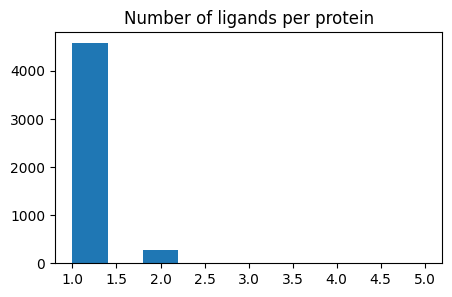

In [254]:
df1 = df['pdb_id'].value_counts()
df1 = df1.sort_values(ascending=False)

plt.figure(figsize=(5,3))
plt.title('Number of ligands per protein')
plt.hist(df1)
plt.show()

In [260]:
example = dict(df[df['pdb_id']=='3zdw'])
example

{'pdb_id': 0    3zdw
 Name: pdb_id, dtype: object,
 'lig_id': 0    EBS
 Name: lig_id, dtype: object,
 'seq': 0    TLEKFVDALPIPDTLKPVQQSKEKTYYEVTMEECTHQLHRDLPPTR...
 Name: seq, dtype: object,
 'smiles': 0    CCn1c(=NN=c2sc3cc(S(=O)(=O)O)ccc3n2CC)sc2cc(S(...
 Name: smiles, dtype: object,
 'receptor_features': 0    {'rigidgroups_gt_frames': [[[[ 0.5147005  -0.8...
 Name: receptor_features, dtype: object,
 'ligand_xyz': 0    [(23.444, 23.223, 15.358), (24.206, 24.037, 16...
 Name: ligand_xyz, dtype: object,
 'ligand_xyz_2d': 0    [(-2.662815908287944, -3.6635448279460823, 0.0...
 Name: ligand_xyz_2d, dtype: object,
 'ligand_bonds': 0    [(13, 31), (31, 15), (15, 30), (30, 16), (16, ...
 Name: ligand_bonds, dtype: object}

In [261]:
example['seq']

0    TLEKFVDALPIPDTLKPVQQSKEKTYYEVTMEECTHQLHRDLPPTR...
Name: seq, dtype: object

In [266]:
test0['seq']

0       MGIVEEAHNVKVLGTGSRFIVLAHGFGTDQSVWKHLVPHLLEEFRV...
1       SNPPPPETSNPNKPKRQTNQLQYLLRVVLKTLWKHQFAWPFQQPVD...
2       GHMIKICIAGKNNIAVNSLQFILKNYFEADQIVVIPNKNDKGIDSW...
3       GHMIKICIAGKNNIAVNSLQFILKNYFEADQIVVIPNKNDKGIDSW...
4       MLGKVALEEAFALPRHKERTRWWAGLFAIDPDKHAAEINDITEQRI...
                              ...                        
3641    AEKLFTPLKVGAVTAPNRVFMAPLTRLRSIEPGDIPTPLMGEYYRQ...
3642    HRALDVATELAKTFRVTVRERERAGGTPKAERDAIRRSGLLTLLIS...
3643    MVEPQHNVMQMGGDFANNPNAQQFIDKMVNKHGFDRQQLQEILSQA...
3644    DAWEIPRESLRLEVKLGQGCFGECWMGTWNGTTRVAIKTLKPGTMS...
3645    HHAADYVLYKDATKPVEDRVADLLGRMTLAEKIGQMTQIERLVATP...
Name: seq, Length: 3646, dtype: object